<a href="https://colab.research.google.com/github/netgvarun2021/Blackbox/blob/main/Monotony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Perform standard imports
import spacy
nlp = spacy.load('en_core_web_sm')

In [19]:
# router = APIRouter()

# class Essay(BaseModel):
#   EssayText:str

def getCountTypeSent(essay_text):
  complex_comp_list=[]
  complex_list=[]
  compound_list=[]
  simple_list=[]
  dep_list = []
  ret_dict = {}
  docu = nlp(essay_text)
  doc_sents = [sent for sent in docu.sents]
  len_tot_sents = len(doc_sents)
  for sents in docu.sents:
    for token in sents:# Tokenize the sentence into words/tokens
      #subtree argument gives the subtree of the token when parsed in dependency parsing.
      subtree = token.subtree
      #Looking at the ancestors of a token can tell us how deep it is
      k = list(token.ancestors)
      #we need to add this to make the indexing work properly
      k.append('added_to_get_proper_indexing')
      #k=2 gives us the first level of the tree, k=3 will give us the next level.
      if(len(k)==2):
        #print([(t.text) for t in subtree], token.dep_)
        dep_list.append(token.dep_)
      #we missed the root phrase in the previous 
      if(token.dep_=='ROOT'):
        k =[token.text]
      #print(k, 'root')

    #complex sentences have (advcl) in their dependency tree
    #compound sentences have (cc)-> coordination and (conj)-> conjuction in their dependency tree
    #compound complex sentences have both the above
    #simple sentences have neither.

    if ('advcl') in dep_list and ('cc') in dep_list and ('conj') in dep_list:
      complex_comp_list.append([sents.start,sents.end])#'Complex-compound sentence')
    elif ('advcl') in dep_list:
      complex_list.append([sents.start,sents.end])#'Complex sentence')
    elif ('cc') in dep_list and ('conj') in dep_list:
      compound_list.append([sents.start,sents.end])#'Compound sentence')
    else:
      simple_list.append([sents.start,sents.end])#'Simple sentence')

  ret_dict['Complex-compound'] = len(complex_comp_list)
  ret_dict['Complex']          = len(complex_list)
  ret_dict['Compound']         = len(compound_list)
  ret_dict['Simple']           = len(simple_list)
  ret_dict['Total']            = len_tot_sents

  return ret_dict

In [4]:
input = '''
What came first, science or technology?” asked a tall and husky figure, who was dressed in an unbuttoned and rather threadbare lab coat. My initial response was science because I reasoned that technology was the application of 
science. An articulated voice from the back of the room, however, soon refuted this idea and devised a cogent argument in favor of technology. The professor then formulated a rebuttal to both of these perspectives, and 
eventually succeeded in placing everyone in a state of quandary. This discussion signaled the advent of the myriad thought-provoking and challenging issues and applications that would arise during the summer I spent at 
the Georgia Governor’s Honors Program. Competition for admission into the program was fierce, even fiercer once in the program. Competition of the latter, however, did not exist with one another as it had during the 
selection process but rather within one’s self. The program held a weekly competition for the science majors in which the professors would present seemingly impossible tasks to be completed within a few hours. On the first 
few competitions, which included constructing a rubber band powered car out of a few sundry items, I did not fare very well and felt vexed by the restrictions. However, one of my friends helped me learn new ways of tackling 
problems. He helped me realize that not all materials need to be used. He helped me see that the most obvious idea will not always be the most successful. He helped me start planning before acting. In effect, he helped me 
crawl out of my suffocating, conventional shell and change my way of thinking.The final competition proved to stretch my mind to its greatest capacity. We were assigned the task of building a boat concocted from some cardboard,
 two garbage bags, and a roll of duck tape. At first thought, this project did not seem challenging at all, that is, until I discovered that two students would have to sit inside the boat and race across the swimming pool. 
 This competition drew together many of the skills I had acquired during that summer, one of them being teamwork, something I had not learned the true meaning of until that summer. At school, “teamwork” would simply imply 
 breaking the assignment into fragmentary pieces and assigning them to each member of the group. The activities at the program, however, soon expunged that fallacy and showed me that true teamwork requires the collaboration
  and unification of simultaneous ideas. Each team member would contribute his or her thoughts to every element of the boat. Resourcefulness was another determining factor in this last competition, as only one roll of duck
   tape would be provided and simply a few hours to build. Everything would need to be planned out meticulously beforehand because, once started, new materials could not be used if construction was botched. Other factors 
   such as creativity, motivation, concentration, and ingenuity, when mixed in the right proportions, would produce a peerless boat, which is exactly what my team accomplished. Not only did I learn from other students, 
   but also from the astute professors. They were some of the best in their profession, with a true passion for teaching and understanding each student’s strengths and weaknesses. Personally, I learned to desist accepting 
   formulas and theorems at face value. The professors supplied us with the facts, and we were the ones to go out and research the concepts and proofs behind them. These skills have surfaced rather quickly, such as on the 
   second day of AP BC Calculus, when the teacher asked us to memorize a formula. I, however, first asked for the proof. The other students groaned upon hearing this, but I grinned, knowing that eight months from now, they 
   were the ones who would be cramming this seemingly senseless formula into their head before the AP exam.I could fill an immense number of pages continuing to delineate what I learned that summer, but, if there was one thing
    to sum up everything, it would be the Rubik’s Cube. When I first encountered this bemusing puzzle, I began by turning the cubes in random configurations, waiting for something to appear. However, I soon discovered that this
     is exactly where I went wrong-that is, nothing in life simply emerges on its own for you; instead, you have to search for it, sometimes at greater depths than ever before. By the middle of the program, I began to organize
      my thoughts and preplan so my configurations would make sense. At the beginning of that summer, my mind was fettered inside the cube as I cursorily searched for meanings. Nonetheless, as the summer crept to an end, I
       learned to organize, revise, concentrate, and not only think ahead, but also think differently. When the program concluded, I knew that I was no longer inside the cube but outside it.
'''
getCountTypeSent(input)

{'Complex': [[29, 46]],
 'Complex-compound': [[46, 72],
  [72, 97],
  [97, 130],
  [130, 146],
  [146, 174],
  [174, 201],
  [201, 236],
  [236, 252],
  [252, 265],
  [265, 282],
  [282, 290],
  [290, 312],
  [312, 325],
  [325, 351],
  [351, 388],
  [388, 422],
  [422, 448],
  [448, 476],
  [476, 492],
  [492, 521],
  [521, 546],
  [546, 581],
  [581, 598],
  [598, 623],
  [623, 638],
  [638, 663],
  [663, 692],
  [692, 702],
  [702, 742],
  [742, 780],
  [780, 804],
  [804, 819],
  [819, 850],
  [850, 873],
  [873, 894],
  [894, 925],
  [925, 945]],
 'Compound': [],
 'Simple': [[0, 10], [10, 29]]}

In [8]:
input = '''
What came first, science or technology?” asked a tall and husky figure, who was dressed in an unbuttoned and rather threadbare lab coat. My initial response was science because I reasoned that technology was the application of 
science. An articulated voice from the back of the room, however, soon refuted this idea and devised a cogent argument in favor of technology. The professor then formulated a rebuttal to both of these perspectives, and 
eventually succeeded in placing everyone in a state of quandary. This discussion signaled the advent of the myriad thought-provoking and challenging issues and applications that would arise during the summer I spent at 
the Georgia Governor’s Honors Program. Competition for admission into the program was fierce, even fiercer once in the program. Competition of the latter, however, did not exist with one another as it had during the 
selection process but rather within one’s self. The program held a weekly competition for the science majors in which the professors would present seemingly impossible tasks to be completed within a few hours. On the first 
few competitions, which included constructing a rubber band powered car out of a few sundry items, I did not fare very well and felt vexed by the restrictions. However, one of my friends helped me learn new ways of tackling 
problems. He helped me realize that not all materials need to be used. He helped me see that the most obvious idea will not always be the most successful. He helped me start planning before acting. In effect, he helped me 
crawl out of my suffocating, conventional shell and change my way of thinking.The final competition proved to stretch my mind to its greatest capacity. We were assigned the task of building a boat concocted from some cardboard,
 two garbage bags, and a roll of duck tape. At first thought, this project did not seem challenging at all, that is, until I discovered that two students would have to sit inside the boat and race across the swimming pool. 
 This competition drew together many of the skills I had acquired during that summer, one of them being teamwork, something I had not learned the true meaning of until that summer. At school, “teamwork” would simply imply 
 breaking the assignment into fragmentary pieces and assigning them to each member of the group. The activities at the program, however, soon expunged that fallacy and showed me that true teamwork requires the collaboration
  and unification of simultaneous ideas. Each team member would contribute his or her thoughts to every element of the boat. Resourcefulness was another determining factor in this last competition, as only one roll of duck
   tape would be provided and simply a few hours to build. Everything would need to be planned out meticulously beforehand because, once started, new materials could not be used if construction was botched. Other factors 
   such as creativity, motivation, concentration, and ingenuity, when mixed in the right proportions, would produce a peerless boat, which is exactly what my team accomplished. Not only did I learn from other students, 
   but also from the astute professors. They were some of the best in their profession, with a true passion for teaching and understanding each student’s strengths and weaknesses. Personally, I learned to desist accepting 
   formulas and theorems at face value. The professors supplied us with the facts, and we were the ones to go out and research the concepts and proofs behind them. These skills have surfaced rather quickly, such as on the 
   second day of AP BC Calculus, when the teacher asked us to memorize a formula. I, however, first asked for the proof. The other students groaned upon hearing this, but I grinned, knowing that eight months from now, they 
   were the ones who would be cramming this seemingly senseless formula into their head before the AP exam.I could fill an immense number of pages continuing to delineate what I learned that summer, but, if there was one thing
    to sum up everything, it would be the Rubik’s Cube. When I first encountered this bemusing puzzle, I began by turning the cubes in random configurations, waiting for something to appear. However, I soon discovered that this
     is exactly where I went wrong-that is, nothing in life simply emerges on its own for you; instead, you have to search for it, sometimes at greater depths than ever before. By the middle of the program, I began to organize
      my thoughts and preplan so my configurations would make sense. At the beginning of that summer, my mind was fettered inside the cube as I cursorily searched for meanings. Nonetheless, as the summer crept to an end, I
       learned to organize, revise, concentrate, and not only think ahead, but also think differently. When the program concluded, I knew that I was no longer inside the cube but outside it.
'''
getCountTypeSent(input)

{'Complex': 1, 'Complex-compound': 37, 'Compound': 0, 'Simple': 2, 'Total': 40}

In [21]:
# IF (5 CONSECUTIVE SIMPLE OR 3 CONSECUTIVE COMPOUND).
# FOR complex and complex compounds, if some consecutive trigrams are repeating.
input = '''
I became interested in penguin habitats about a year ago. I worked in the local zoo, and I volunteered for the penguin house because I like cold weather.I read many books on penguin behaviour and biology.
I also discussed the birds's habitat with the chief keeper.I learned quite a bit about these animals, and I want to major in penguin biology in college.
'''
getCountTypeSent(input)

{'Complex': 0, 'Complex-compound': 0, 'Compound': 4, 'Simple': 1, 'Total': 5}

In [20]:
input = '''
Working in a local zoo about a year ago, I became interested in penguins. Because I like cold weather, I volunteered for the penguin house.Books on penguin behaviour and biology and conversations with chief keeper educated
me about these birds, and I'd like to learn more about this subject in college.
'''
getCountTypeSent(input)

{'Complex': 2, 'Complex-compound': 1, 'Compound': 0, 'Simple': 0, 'Total': 3}

In [22]:
input = '''
It was an exhilarating moment that set my heart aflutter. I had in my head an image of James Bond, speeding down a foreign highway in pursuit of justice, a dazzling femme-fatale steering the car ahead of him. As soon as the car stuttered to a start, however, the image in my mind was quickly shattered. I realized that like so many things, driving looked a lot easier in the movies. My decision to learn how to drive came about after a conversation with one of my friends from America who had excitedly informed me of her new possession: a car. I asked my father to sign me up for driving lessons. At only 100 rupees a day (approximately $2), the lessons were at least financially plausible.It was on my third day of driving lessons that I first saw him: a scrawny-looking boy with unkempt hair and a dirty white shirt who sat quietly in the back of the car. My instructor explained to me that he had just finished his driving lesson. I glanced at him through the rear-view mirror and smiled politely when his eyes made contact with mine.Back at the instructor’s office we began talking, and I soon learned that the boy was as old as I was. He explained to me that he was learning how to drive so that he could apply for a license. He would have to lie about his age, he said, but after receiving his license he would be able to start driving a taxi to help his father earn some extra money for the family. He proudly told me that he had saved money for a year to be able to afford half of the driving lessons, and that he hoped to learn enough to skip the other half.My new-found friend, Rohan, presented an interesting contrast. While I hadn’t thought twice about asking my father to spend money on me, he hadn’t thought twice about pursuing this endeavor to help his father earn money. My fantasies of being able to speed down a freeway seemed shockingly immature in comparison to his dreams of being able to support his family. A few months later, I was in the backseat of my car, when we abruptly halted at a red light. A small “Ambassador” car pulled up beside us. The black-and-green coloring gave away the identity of the vehicle as one of the many old taxis in the city. I looked across at the car, and was surprised to see Rohan looking back at me. When his eyes made contact with mine, my smile was one of warmth and respect. If my eyes had spoken that day, they would have thanked him for teaching me the importance of pursuing selfless goals. They would have thanked him for teaching me that sometimes it is necessary to sacrifice and take risks. They would have thanked him for teaching me that sometimes we have to learn to drive so that we can give others a ride.
'''
getCountTypeSent(input)

{'Complex': 8, 'Complex-compound': 16, 'Compound': 0, 'Simple': 1, 'Total': 25}

In [23]:
input = '''
Sweat poured down my face as I struggled to breathe. I was dehydrated and exhausted, and I was trying as hard as I could not to give up. From the bleachers and the sidelines, the eyes of every member of the crowd were focused intently on me. One side of the gym hoped I would fail, and the other side prayed that I would succeed. The muscles in my legs were undergoing uncontrollable spasms. It seemed that I could not continue, but if I surrendered to the pleas of my body, I would not only be failing myself, but failing everyone on my wrestling team. All I could think about was winning my match. I absolutely had to win. As I looked around at the large crowd in my opponent’s school gymnasium, panic struck me, but then I convinced myself that I would win this match no matter what. The piercing noise of the referee’s whistle split the air, and I knew it was time to continue. We had reached double overtime, something that I had never seen occur throughout my four years of competitive wrestling. The importance of this match was very clear. Each point the judges awarded could mean the difference between winning and losing the tournament. If I could control my opponent for thirty more seconds, I would be walking out of the ring with my chin up. The first ten seconds of the match passed quickly. Then, seemingly time stood still. The other team began chanting to inspire my opponent. Each second seemed like an hour. I felt eternity pass by. My opponent stood up, but I maintained the control. My team began to count down the last five seconds of the match. My mind and my body were fighting their own battle. As my teammates yelled “Two,” I let go. I lost the match by two seconds. The points awarded to the other team for that win gave them the lead. Because of my failure to physically endure those final two seconds, our entire team lost the tournament. This momentous loss taught me in a very striking way about the importance of preparation and training. In retrospect, I knew if I had set a more rigorous training schedule for myself, I would not have lost the match. This lesson is especially valuable because it can be applied to everything. In every challenge-in academics, in athletics, and in life, the more prepared and well-studied opponent will emerge victorious.
'''
getCountTypeSent(input)

{'Complex': 1, 'Complex-compound': 30, 'Compound': 0, 'Simple': 0, 'Total': 31}

# **SIMPLE SENTENCES**
A simple sentence contains a subject and a verb. A simple sentence is also often called an independent clause because it can exist on its own without anything else. The clause may also contain an object or a complement.

An object is the thing or person affected by the subject (e.g. My boss fired me). A complement describes the subject (e.g. I felt sad), or the object (e.g. (He made me angry).

In English there are five types of simple clause:
 	 	
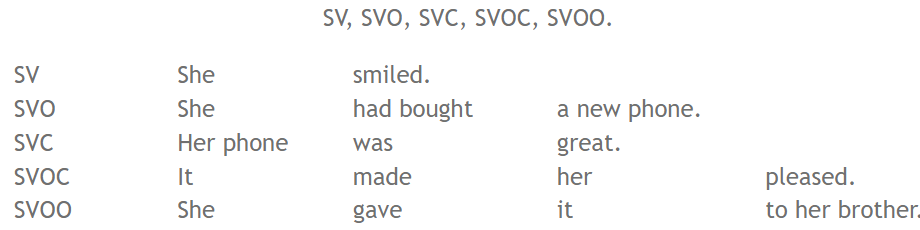

In [176]:
# Enter your code here:
doc = nlp(u'She smiled.She had bought a new phone.Her phone was great.It made her pleased.She gave it to her brother.')

for sent in doc.sents:
  for token in sent:
    print(f'{token.text:{12}} {token.pos_:{6}} {token.tag_:{9}} {spacy.explain(token.tag_):{43}} {token.dep_:{14}} {spacy.explain(token.dep_)}')
  print()


She          PRON   PRP       pronoun, personal                           nsubj          nominal subject
smiled       VERB   VBD       verb, past tense                            ROOT           None
.            PUNCT  .         punctuation mark, sentence closer           punct          punctuation

She          PRON   PRP       pronoun, personal                           nsubj          nominal subject
had          AUX    VBD       verb, past tense                            aux            auxiliary
bought       VERB   VBN       verb, past participle                       ROOT           None
a            DET    DT        determiner                                  det            determiner
new          ADJ    JJ        adjective                                   amod           adjectival modifier
phone        NOUN   NN        noun, singular or mass                      dobj           direct object
.            PUNCT  .         punctuation mark, sentence closer           punct          

# **COMPOUND SENTENCES**
A compound sentence contains at least two independent clauses joined by a coordinating conjunction, a correlative conjunction or a conjunctive adverb. A compound sentence cannot have a dependent clause. Conjunctions are words such as for, and, nor, but, or, yet, so (the first letters of which spell "fanboys")

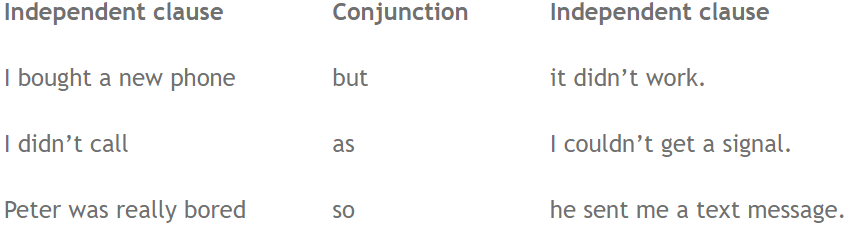

In [175]:
# Enter your code here:
doc = nlp(u'I bought a new phone but it didn’t work.I didn’t call as Raymond couldn’t get a signal.Peter was really bored,so he sent me a text message.')

for sent in doc.sents:
  for token in sent:
    print(f'{token.text:{12}} {token.pos_:{6}} {spacy.explain(token.pos_):{30}}  {token.tag_:{9}} {spacy.explain(token.tag_):{43}} {token.dep_:{14}} {spacy.explain(token.dep_)}')
  print()



I            PRON   pronoun                         PRP       pronoun, personal                           nsubj          nominal subject
bought       VERB   verb                            VBD       verb, past tense                            ROOT           None
a            DET    determiner                      DT        determiner                                  det            determiner
new          ADJ    adjective                       JJ        adjective                                   amod           adjectival modifier
phone        NOUN   noun                            NN        noun, singular or mass                      dobj           direct object
but          CCONJ  coordinating conjunction        CC        conjunction, coordinating                   cc             coordinating conjunction
it           PRON   pronoun                         PRP       pronoun, personal                           nsubj          nominal subject
did          AUX    auxiliary                 

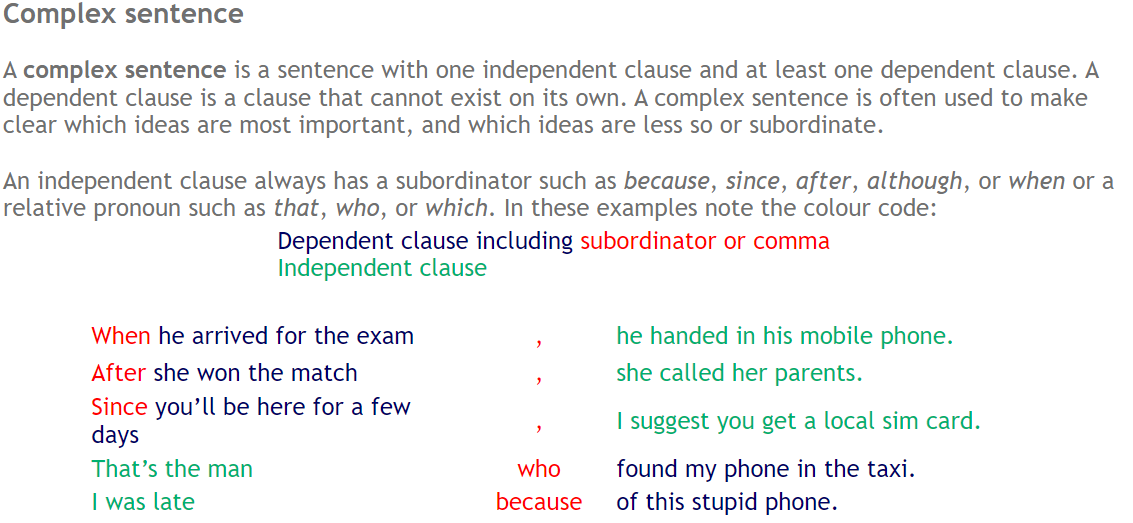

In [63]:
# Enter your code here:
doc = nlp(u'When he arrived for the exam,he handed in his mobile phone. After she won the match, she called her parents. Since you\'ll be here for a few days, I suggest you get a local sim card.\
That\'s the man who found my phone in the taxi.I was late because of this stupid phone.')

for sent in doc.sents:
  for token in sent:
    print(f'{token.text:{12}} {token.pos_:{6}} {spacy.explain(token.pos_):{30}}  {token.tag_:{9}} {spacy.explain(token.tag_):{43}} {token.dep_:{14}} {spacy.explain(token.dep_)}')
  print()


When         ADV    adverb                          WRB       wh-adverb                                   advmod         adverbial modifier
he           PRON   pronoun                         PRP       pronoun, personal                           nsubj          nominal subject
arrived      VERB   verb                            VBD       verb, past tense                            advcl          adverbial clause modifier
for          ADP    adposition                      IN        conjunction, subordinating or preposition   prep           prepositional modifier
the          DET    determiner                      DT        determiner                                  det            determiner
exam         NOUN   noun                            NN        noun, singular or mass                      pobj           object of preposition
,            PUNCT  punctuation                     ,         punctuation mark, comma                     punct          punctuation
he           PRON   pron

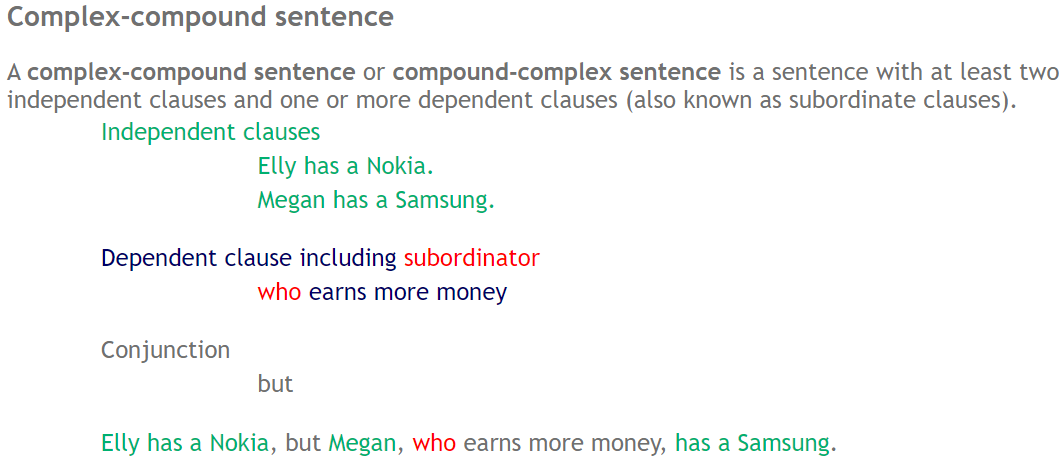

In [96]:
# Enter your code here:
doc = nlp(u'Elly has a Nokia,but Megan,who earns more money,has a Samsung.')
# doc = nlp(u'It doesn’t matter how slowly you go as long as you don’t stop and you don’t drink')
# text = "This all encompassing experience wore off for a moment and in that moment, my awareness came gasping to the surface of the hallucination and I was able to consider momentarily that I had killed myself by taking an outrageous dose of an online drug and this was the most pathetic death experience of all time."
# text = 'Kate doesn’t like cartoons because they are loud, so she doesn’t watch them.'
# doc = nlp(text)
for sent in doc.sents:
  for token in sent:
    print(f'{token.text:{12}} {token.pos_:{6}} {spacy.explain(token.pos_):{30}}  {token.tag_:{9}} {spacy.explain(token.tag_):{43}} {token.dep_:{14}} {spacy.explain(token.dep_)}')
  print()


Elly         ADV    adverb                          RB        adverb                                      advmod         adverbial modifier
has          AUX    auxiliary                       VBZ       verb, 3rd person singular present           ROOT           None
a            DET    determiner                      DT        determiner                                  det            determiner
Nokia        PROPN  proper noun                     NNP       noun, proper singular                       dobj           direct object
,            PUNCT  punctuation                     ,         punctuation mark, comma                     punct          punctuation
but          CCONJ  coordinating conjunction        CC        conjunction, coordinating                   cc             coordinating conjunction
Megan        PROPN  proper noun                     NNP       noun, proper singular                       nsubj          nominal subject
,            PUNCT  punctuation                    

In [93]:
import spacy
en = spacy.load('en_core_web_sm')

text = "This all encompassing experience wore off for a moment and in that moment, my awareness came gasping to the surface of the hallucination and I was able to consider momentarily that I had killed myself by taking an outrageous dose of an online drug and this was the most pathetic death experience of all time."
text = "Elly has a Nokia,but Megan,who earns more money,has a Samsung."
text = "I bought a new phone but it didn’t work."
text = "When he arrived for the exam,he handed in his mobile phone"
text  = "After she won the match, she called her parents"
text = "Because I am working now, we will eat later."
text  = 'When I grow up, I’ll use complete sentences'
text = 'It doesn’t matter how slowly you go as long as you don’t stop and you don’t drink'
doc = en(text)
#deplacy.render(doc)

seen = set() # keep track of covered words

chunks = []
for sent in doc.sents:
    heads = [cc for cc in sent.root.children if cc.dep_ == 'cc']
    print(heads)
    for head in heads:
        words = [ww for ww in head.subtree]
        #print(words)
        #print()
        for word in words:
            seen.add(word)
        chunk = (' '.join([ww.text for ww in words]))
        chunks.append( (head.i, chunk) )

    unseen = [ww for ww in sent if ww not in seen]
    chunk = ' '.join([ww.text for ww in unseen])
    chunks.append( (sent.root.i, chunk) )

chunks = sorted(chunks, key=lambda x: x[0])

for ii, chunk in chunks:
    print(chunk)

[]
[and]
It does n’t matter how slowly you go as long as you do n’t stop
and
you do n’t drink


In [73]:
doc = nlp(u'Peter was really bored so he sent me a text message.I was late because of this stupid phone.')

for sent in doc.sents:
  for token in sent:
    print(f'{token.text:{12}} {token.pos_:{6}} {spacy.explain(token.pos_):{30}}  {token.tag_:{9}} {spacy.explain(token.tag_):{43}} {token.dep_:{14}} {spacy.explain(token.dep_)}')
  print()

Peter        PROPN  proper noun                     NNP       noun, proper singular                       nsubj          nominal subject
was          AUX    auxiliary                       VBD       verb, past tense                            ROOT           None
really       ADV    adverb                          RB        adverb                                      advmod         adverbial modifier
bored        ADJ    adjective                       JJ        adjective                                   acomp          adjectival complement

so           SCONJ  subordinating conjunction       IN        conjunction, subordinating or preposition   advmod         adverbial modifier
he           PRON   pronoun                         PRP       pronoun, personal                           nsubj          nominal subject
sent         VERB   verb                            VBD       verb, past tense                            ROOT           None
me           PRON   pronoun                       

In [79]:
# router = APIRouter()

# class Essay(BaseModel):
#   EssayText:str

def getCountTypeSent(essay_text):
  complex_comp_list=[]
  complex_list=[]
  compound_list=[]
  simple_list=[]
  dep_list = []
  ret_dict = {}
  docu = nlp(essay_text)
  doc_sents = [sent for sent in docu.sents]
  len_tot_sents = len(doc_sents)
  for sents in docu.sents:
    for token in sents:# Tokenize the sentence into words/tokens
      #subtree argument gives the subtree of the token when parsed in dependency parsing.
      subtree = token.subtree
      #Looking at the ancestors of a token can tell us how deep it is
      k = list(token.ancestors)
      #we need to add this to make the indexing work properly
      k.append('added_to_get_proper_indexing')
      #k=2 gives us the first level of the tree, k=3 will give us the next level.
      if(len(k)==2):
        #print([(t.text) for t in subtree], token.dep_)
        dep_list.append(token.dep_)
      #we missed the root phrase in the previous 
      if(token.dep_=='ROOT'):
        k =[token.text]
      #print(k, 'root')

    #complex sentences have (advcl) in their dependency tree
    #compound sentences have (cc)-> coordination and (conj)-> conjuction in their dependency tree
    #compound complex sentences have both the above
    #simple sentences have neither.

    if ('advcl') in dep_list and ('cc') in dep_list and ('conj') in dep_list:
      complex_comp_list.append([sents.start,sents.end,sents])#'Complex-compound sentence')
    elif ('advcl') in dep_list:
      complex_list.append([sents.start,sents.end,sents])#'Complex sentence')
    elif ('cc') in dep_list and ('conj') in dep_list:
      compound_list.append([sents.start,sents.end,sents])#'Compound sentence')
    else:
      simple_list.append([sents.start,sents.end,sents])#'Simple sentence')

  ret_dict['Complex-compound'] = (complex_comp_list)
  ret_dict['Complex']          = (complex_list)
  ret_dict['Compound']         = (compound_list)
  ret_dict['Simple']           = (simple_list)
  ret_dict['Total']            = len_tot_sents

  return ret_dict
getCountTypeSent('Elly has a Nokia,but Megan,who earns more money,has a Samsung.')

{'Complex': [],
 'Complex-compound': [],
 'Compound': [[0,
   17,
   Elly has a Nokia,but Megan,who earns more money,has a Samsung.]],
 'Simple': [],
 'Total': 1}

In [150]:
# IF (5 CONSECUTIVE SIMPLE OR 3 CONSECUTIVE COMPOUND).
# FOR complex and complex compounds, if some consecutive trigrams are repeating.

# If there is 'cc' in the dependency tree, then the sentence is MORE LIKELY TO BE COMPLEX COMPOUND SENTENCE or COMPOUND but not COMPLEX! or SIMPLE!

Next check for 'acl','advcl' then, it will be COMPLEX COMPOUND and not COMPOUND!

In [149]:
from nltk.stem.wordnet import WordNetLemmatizer
#from spacy.en import English

SUBJECTS = ["nsubj", "nsubjpass", "csubj", "csubjpass", "agent", "expl"]
OBJECTS = ["dobj", "dative", "attr", "oprd"]

def getSubsFromConjunctions(subs):
    moreSubs = []
    for sub in subs:
        # rights is a generator
        rights = list(sub.rights)
        print(rights)
        rightDeps = {tok.lower_ for tok in rights}
        if "and" in rightDeps:
            moreSubs.extend([tok for tok in rights if tok.dep_ in SUBJECTS or tok.pos_ == "NOUN"])
            if len(moreSubs) > 0:
                moreSubs.extend(getSubsFromConjunctions(moreSubs))
    return moreSubs

def getObjsFromConjunctions(objs):
    moreObjs = []
    for obj in objs:
        # rights is a generator
        rights = list(obj.rights)
        rightDeps = {tok.lower_ for tok in rights}
        if "and" in rightDeps:
            moreObjs.extend([tok for tok in rights if tok.dep_ in OBJECTS or tok.pos_ == "NOUN"])
            if len(moreObjs) > 0:
                moreObjs.extend(getObjsFromConjunctions(moreObjs))
    return moreObjs

def getVerbsFromConjunctions(verbs):
    moreVerbs = []
    for verb in verbs:
        rightDeps = {tok.lower_ for tok in verb.rights}
        if "and" in rightDeps:
            moreVerbs.extend([tok for tok in verb.rights if tok.pos_ == "VERB"])
            if len(moreVerbs) > 0:
                moreVerbs.extend(getVerbsFromConjunctions(moreVerbs))
    return moreVerbs

def findSubs(tok):
    head = tok.head
    while head.pos_ != "VERB" and head.pos_ != "NOUN" and head.head != head:
        head = head.head
    if head.pos_ == "VERB":
        subs = [tok for tok in head.lefts if tok.dep_ == "SUB"]
        if len(subs) > 0:
            verbNegated = isNegated(head)
            subs.extend(getSubsFromConjunctions(subs))
            return subs, verbNegated
        elif head.head != head:
            return findSubs(head)
    elif head.pos_ == "NOUN":
        return [head], isNegated(tok)
    return [], False

def isNegated(tok):
    negations = {"no", "not", "n't", "never", "none"}
    for dep in list(tok.lefts) + list(tok.rights):
        if dep.lower_ in negations:
            return True
    return False

def findSVs(tokens):
    svs = []
    verbs = [tok for tok in tokens if tok.pos_ == "VERB"]
    for v in verbs:
        subs, verbNegated = getAllSubs(v)
        if len(subs) > 0:
            for sub in subs:
                svs.append((sub.orth_, "!" + v.orth_ if verbNegated else v.orth_))
    return svs

def getObjsFromPrepositions(deps):
    objs = []
    for dep in deps:
        if dep.pos_ == "ADP" and dep.dep_ == "prep":
            objs.extend([tok for tok in dep.rights if tok.dep_  in OBJECTS or (tok.pos_ == "PRON" and tok.lower_ == "me")])
    return objs

def getObjsFromAttrs(deps):
    for dep in deps:
        if dep.pos_ == "NOUN" and dep.dep_ == "attr":
            verbs = [tok for tok in dep.rights if tok.pos_ == "VERB"]
            if len(verbs) > 0:
                for v in verbs:
                    rights = list(v.rights)
                    objs = [tok for tok in rights if tok.dep_ in OBJECTS]
                    objs.extend(getObjsFromPrepositions(rights))
                    if len(objs) > 0:
                        return v, objs
    return None, None

def getObjFromXComp(deps):
    for dep in deps:
        if dep.pos_ == "VERB" and dep.dep_ == "xcomp":
            v = dep
            rights = list(v.rights)
            objs = [tok for tok in rights if tok.dep_ in OBJECTS]
            objs.extend(getObjsFromPrepositions(rights))
            if len(objs) > 0:
                return v, objs
    return None, None

def getAllSubs(v):
    verbNegated = isNegated(v)
    subs = [tok for tok in v.lefts if tok.dep_ in SUBJECTS and tok.pos_ != "DET"]
    #print(subs)
    if len(subs) > 0:
        subs.extend(getSubsFromConjunctions(subs))
    else:
        foundSubs, verbNegated = findSubs(v)
        subs.extend(foundSubs)
    return subs, verbNegated

def getAllObjs(v):
    # rights is a generator
    rights = list(v.rights)
    print(rights)
    objs = [tok for tok in rights if tok.dep_ in OBJECTS]
    objs.extend(getObjsFromPrepositions(rights))

    #potentialNewVerb, potentialNewObjs = getObjsFromAttrs(rights)
    #if potentialNewVerb is not None and potentialNewObjs is not None and len(potentialNewObjs) > 0:
    #    objs.extend(potentialNewObjs)
    #    v = potentialNewVerb

    potentialNewVerb, potentialNewObjs = getObjFromXComp(rights)
    if potentialNewVerb is not None and potentialNewObjs is not None and len(potentialNewObjs) > 0:
        objs.extend(potentialNewObjs)
        v = potentialNewVerb
    if len(objs) > 0:
        objs.extend(getObjsFromConjunctions(objs))
    return v, objs

def findSVOs(tokens):
    svos = []
    verbs = [tok for tok in tokens if tok.pos_ == "VERB" or tok.pos_ == "AUX" ]#and tok.dep_ != "aux"]
    for v in verbs:
        subs, verbNegated = getAllSubs(v)
        #print(subs)
        # hopefully there are subs, if not, don't examine this verb any longer
        if len(subs) > 0:
            v, objs = getAllObjs(v)
            for sub in subs:
                for obj in objs:
                    objNegated = isNegated(obj)
                    svos.append((sub.lower_, "!" + v.lower_ if verbNegated or objNegated else v.lower_, obj.lower_))
    return svos

def printDeps(toks):
    for tok in toks:
        print(tok.orth_, tok.dep_, tok.pos_, tok.head.orth_, [t.orth_ for t in tok.lefts], [t.orth_ for t in tok.rights])

def testSVOs():
    #nlp = English()

    tok = nlp("making $12 an hour? where am i going to go? i have no other financial assistance available and he certainly won't provide support.")
    tok = nlp("Elly has a Nokia,but Megan,who earns more money,has a Samsung.")
    tok = nlp("When he arrived for the exam,he handed in his mobile phone")
    tok = nlp("She smiled.She had bought a new phone.Her phone was great.It made her pleased.She gave it to her brother.") # Simple
    tok = nlp("I bought a new phone but it didn’t work.I didn’t call as I couldn’t get a signal.Peter was really bored so he sent me a text message.") # Compound
    tok = nlp('Because it was raining, the football match was cancelled.')
    #svos = findSVOs(tok)
    svs = findSVs(tok)
    printDeps(tok)
    #assert set(svos) == {('i', '!have', 'assistance'), ('he', '!provide', 'support')}
    print()
    print(svs)

testSVOs()

[]
Because mark SCONJ was [] []
it nsubj PRON was [] []
was advcl AUX cancelled ['Because', 'it'] ['raining']
raining acomp VERB was [] []
, punct PUNCT cancelled [] []
the det DET match [] []
football compound NOUN match [] []
match nsubjpass NOUN cancelled ['the', 'football'] []
was auxpass AUX cancelled [] []
cancelled ROOT VERB cancelled ['was', ',', 'match', 'was'] ['.']
. punct PUNCT cancelled [] []

[('match', 'cancelled')]


In [186]:
# router = APIRouter()

# class Essay(BaseModel):
#   EssayText:str

def getCountTypeSent(essay_text):
  pos_list=[]
  complex_list=[]
  compound_list=[]
  sent_list=[]
  dep_list = []
  ret_dict = {}
  docu = nlp(essay_text)
  doc_sents = [sent for sent in docu.sents]
  len_tot_sents = len(doc_sents)
  for sents in docu.sents:
    dep_list = []
    pos_list=[]
    for token in sents:# Tokenize the sentence into words/tokens
        dep_list.append(token.dep_)
        pos_list.append(token.pos_)

    #complex sentences have (advcl) in their dependency tree
    #compound sentences have (cc)-> coordination and (conj)-> conjuction in their dependency tree
    #compound complex sentences have both the above
    #simple sentences have neither.
    # print(sents)
    # print(dep_list)
    print()
    #if ('advcl') in dep_list or ('ccomp') in dep_list or ('xcomp') in dep_list or ('csubj') in dep_list or ('acl') in dep_list or ('csubjpass') in dep_list or ('relcl') in dep_list:
    if any(dep in dep_list for dep in ['advcl', 'ccomp','xcomp','csubj','acl','csubjpass','relcl']):
      sent_list.append('CX')#'Complex-compound sentence')
    elif any(dep in pos_list for dep in ['CCONJ', 'SCONJ','CONJ']):
      sent_list.append('CO')#'Compound sentence')
    else:
      sent_list.append('SI')#'Simple sentence')

  # ret_dict['Complex']          = (complex_list)
  # ret_dict['Compound']         = (compound_list)
  # ret_dict['Simple']           = (simple_list)
  # ret_dict['Total']            = len_tot_sents

  return ''.join(sent_list)
input_str = getCountTypeSent('Elly has a Nokia,but Megan,who earns more money,has a Samsung. When he arrived for the exam,he handed in his mobile phone. I bought a new phone but it didn’t work.I didn’t call as Raymond couldn’t get a signal.Peter was really bored,so he sent me a text message.She smiled.She had bought a new phone.She gave it to her brother.Her phone was great.It made her pleased.')

In [187]:
import re
pattern = 'SI'
print(input_str)
match = re.search(f'({pattern})+', input_str)
start, end = match.span()
consecutive_matches = (end-start)//len(pattern)
print(consecutive_matches)  # outputs 2

CXCXCOCXCXSISISISICX
4


In [162]:




# Enter your code here:
doc = nlp(u'Pizza is great because it combines cheese and pineapple. \
Test takes who rely on third-party questions are putting themselves in a bad spot.\
At my restaurent, I\'m going to put bananas on pizza,which is sure to be a hit.\
Why you\'re here is to make money without much doing much effort.\
What she said was worth remembering.\
I believe that things will improve in the coming years.\
What you\'re doing is unacceptable.\
My head grew heavy,and my sighy grew dim')

for sent in doc.sents:
  for token in sent:
    print(f'{token.text:{12}} {token.pos_:{6}} {spacy.explain(token.pos_):{30}}  {token.tag_:{9}} {spacy.explain(token.tag_):{43}} {token.dep_:{14}} {spacy.explain(token.dep_)}')
  print()


Pizza        NOUN   noun                            NN        noun, singular or mass                      nsubj          nominal subject
is           AUX    auxiliary                       VBZ       verb, 3rd person singular present           ROOT           None
great        ADJ    adjective                       JJ        adjective                                   acomp          adjectival complement
because      SCONJ  subordinating conjunction       IN        conjunction, subordinating or preposition   mark           marker
it           PRON   pronoun                         PRP       pronoun, personal                           nsubj          nominal subject
combines     VERB   verb                            VBZ       verb, 3rd person singular present           advcl          adverbial clause modifier
cheese       NOUN   noun                            NN        noun, singular or mass                      dobj           direct object
and          CCONJ  coordinating conjunction   